In [42]:
import numpy as np
import librosa as lr
from librosa import feature, display
import matplotlib.pyplot as plt
import os
from IPython.display import Audio

In [20]:
silence_dir = '/home/ci411/SpokenWeb/silence_examples/'
silence_audio = []
for i in range(10):
    path = silence_dir + str(i) + '.wav'
    audio_tmp, sr = lr.core.load(path)
    silence_audio.append(audio_tmp)


In [99]:
Audio(data = silence_audio[6], rate = sr)

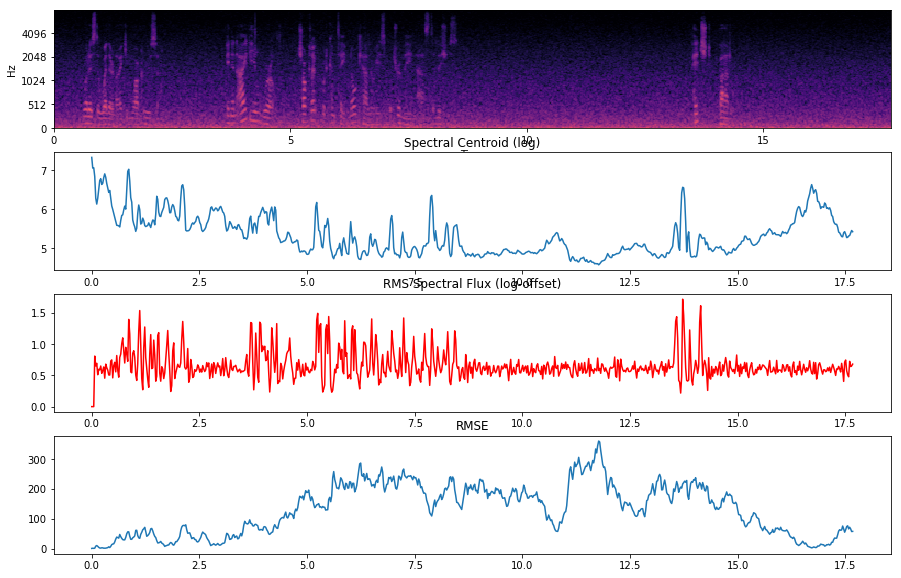

In [109]:
frame = 2048
hop = 512
audio = silence_audio[6]

plt.figure(figsize=(15,10))
plt.subplot(4,1,1)
S = lr.feature.melspectrogram(y = audio, sr = sr, n_fft = frame, hop_length = hop)
log_S = lr.power_to_db(S, ref=np.max)
melspec = lr.display.specshow(log_S, y_axis='mel', fmax=8000, x_axis='time', sr=sr, hop_length = hop)


plt.subplot(4,1,2)
spc = lr.feature.spectral_centroid(y = audio, sr=sr, n_fft = frame, hop_length = hop)[0]
t = np.arange(len(spc)) * (hop/sr)
plt.title('Spectral Centroid (log)')
plt.plot(t, np.log(spc))

plt.subplot(4,1,3)
spf = lr.onset.onset_strength(y = audio, sr=sr, n_fft = frame, hop_length = hop)
t = np.arange(len(spf)) * (hop/sr)
plt.title('RMS Spectral Flux (log-offset)')
plt.plot(t, np.log(1+np.sqrt(np.power(spf,2))), 'r-')

plt.subplot(4,1,4)
rms = lr.feature.rmse(S=S, frame_length=frame, hop_length=hop)[0]
t = np.arange(len(rms)) * (hop/sr)
plt.title('RMSE')
plt.plot(t, (rms))
plt.show()

In [102]:
det_dir = '/home/ci411/SpokenWeb/detection_examples/'
det_audio = []
for i in range(10):
    path = det_dir + "voice_detection_" + str(i) + '.wav'
    audio_tmp, sr = lr.core.load(path)
    det_audio.append(audio_tmp)

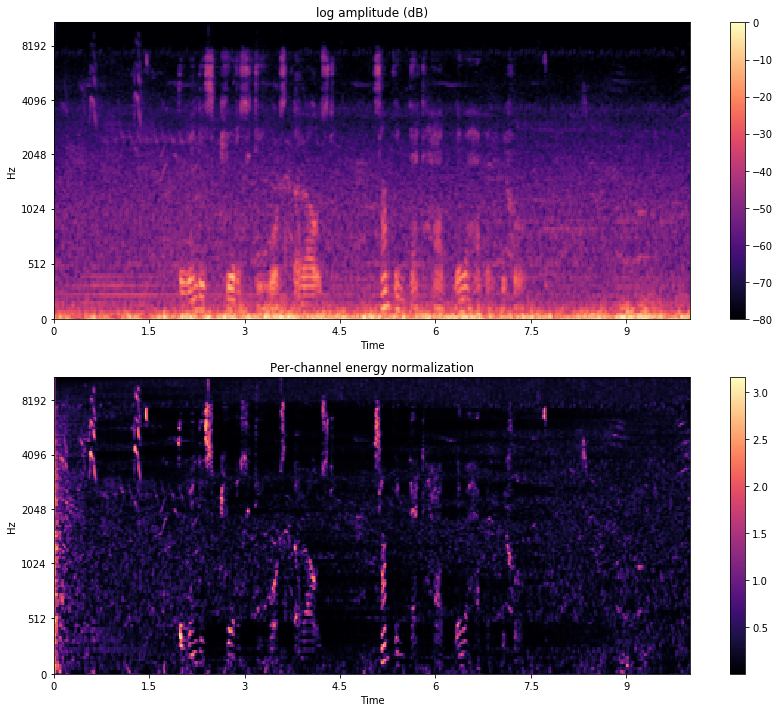

In [122]:
frame = 2048
hop = 512
audio = det_audio[5]

S = lr.feature.melspectrogram(y = audio, sr = sr, n_fft = frame, hop_length = hop)
log_S = lr.power_to_db(S, ref=np.max)

pcen_S = lr.pcen(S)

plt.figure(figsize = (12,10))
plt.subplot(2,1,1)
lr.display.specshow(log_S, x_axis='time', y_axis='mel')
plt.title('log amplitude (dB)')
plt.subplot(2,1,2)
lr.display.specshow(pcen_S, x_axis='time', y_axis='mel')
plt.title('Per-channel energy normalization')
plt.tight_layout()

plt.show()

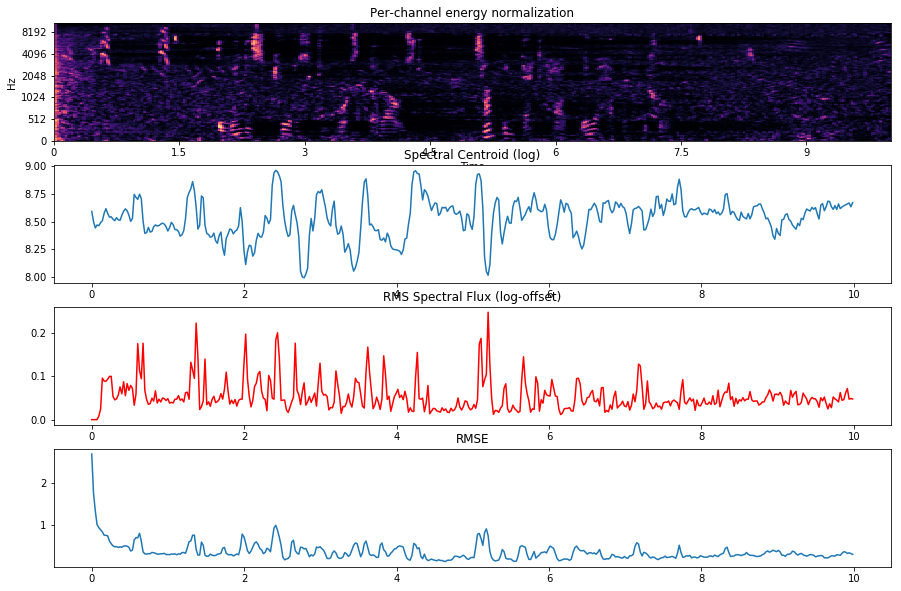

In [123]:
plt.figure(figsize=(15,10))
plt.subplot(4,1,1)
lr.display.specshow(pcen_S, x_axis='time', y_axis='mel')
plt.title('Per-channel energy normalization')


plt.subplot(4,1,2)
spc = lr.feature.spectral_centroid(S=pcen_S, sr=sr, n_fft = frame, hop_length = hop)[0]
t = np.arange(len(spc)) * (hop/sr)
plt.title('Spectral Centroid (log)')
plt.plot(t, np.log(spc))

plt.subplot(4,1,3)
spf = lr.onset.onset_strength(S=pcen_S, sr=sr, n_fft = frame, hop_length = hop)
t = np.arange(len(spf)) * (hop/sr)
plt.title('RMS Spectral Flux (log-offset)')
plt.plot(t, np.log(1+np.sqrt(np.power(spf,2))), 'r-')

plt.subplot(4,1,4)
rms = lr.feature.rmse(S=pcen_S, frame_length=frame, hop_length=hop)[0]
t = np.arange(len(rms)) * (hop/sr)
plt.title('RMSE')
plt.plot(t, (rms))
plt.show()

In [121]:
Audio(data = det_audio[5], rate = sr)